# Final Project Submission

Please fill out:
* Student name: Bonface Mang'oka
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Roselyne
* Blog post URL: http://localhost:8888/notebooks/Documents/PROJECT%20PHASE%201/dsc-phase-1-project/student.ipynb


## Microsoft Movie Analysis: Phase 1 Data Science Project




## Project Overview
This Project covers some of the steps used in data analysis using Python, mostly using inbuilt libraries.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. i am charged with exploring what types of films are currently doing the best at the box office then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



# The Data

The data provided was pulled from several sources

Box Office MojoLinks to an external site.
IMDBLinks to an external site.
Rotten TomatoesLinks to an external site.
TheMovieDBLinks to an external site.
The NumbersLinks to an external site.

I used the below data for the project.

imdb.title.basics
imdb.title.ratings
bom.movie_gross

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie = pd.read_csv("bom.movie_gross.csv.gz")


In [3]:
title_ratings = pd.read_csv("imdb.title.ratings.csv.gz")

In [4]:
title_basics = pd.read_csv("imdb.title.basics.csv.gz")

After importing data into Pandas DataFrames, I created a list of all data frames and used a for loop to preview the first five rows of data and the data info which gives an idea of the number of rows with values, column names, and data types for each data frame.

In [5]:
all_dfs = [movie, title_ratings, title_basics]
df_names = ["movie", "title_ratings", "title basics"]
for i in range(len(all_dfs)):
    print(df_names[i], '\n')
    display(all_dfs[i].info())
    display(all_dfs[i].head())


movie 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


title_ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


title basics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# DATA CLEANING
Cleaning data is crucial before data analysis so i spend some time is checking and dealing with missing values.

In [6]:
#locating missing values

movie.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
title_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [8]:
title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
# missing values with the median in order to avoid affecting the distribution of the data
movie['domestic_gross'].fillna(movie.domestic_gross.median(), inplace=True)
movie['foreign_gross'].fillna(movie.domestic_gross.median(), inplace=True)

In [10]:
movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,1400000.0,2018
3384,El Pacto,Sony,2500.0,1400000.0,2018
3385,The Swan,Synergetic,2400.0,1400000.0,2018


In [14]:
#Remove extraneous comma 
movie['foreign_gross'].replace(',', '', regex=True, inplace=True)
#Change foreign_gross to float64
movie['foreign_gross'] = movie['foreign_gross'].astype('float64')

In [15]:
movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,1400000.0,2018
3384,El Pacto,Sony,2500.0,1400000.0,2018
3385,The Swan,Synergetic,2400.0,1400000.0,2018


In [17]:
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [29]:
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


# Joining the MovieTitle and Ratings data

In [36]:
joined_df = title_basics.set_index('tconst').join(title_ratings.set_index('tconst'))
joined_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


# Sorting data

In [37]:
joined_df_votes = joined_df.sort_values('averagerating')
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


# Dropping Missing Values for the Data

In [38]:
joined_df_votes = joined_df_votes.dropna()
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0


# HIGHEST RATING

In [39]:
Highest_rating = joined_df_votes.tail(10)
Highest_rating

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5.0
tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8.0
tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5.0
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7.0
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0


# Relationship between runtime_minutes and averagerating

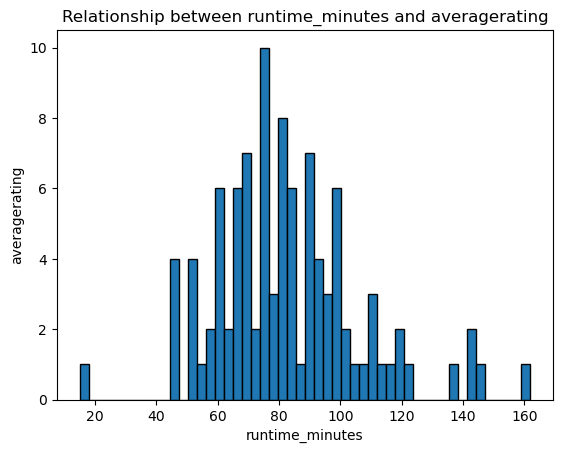

In [40]:
x = joined_df_votes['runtime_minutes'].head(100)
y = joined_df_votes['averagerating'].head(100)
plt.hist(x, bins = 50, edgecolor='black')

plt.xlabel('runtime_minutes')
plt.ylabel('averagerating')
plt.title('Relationship between runtime_minutes and averagerating')
plt.show()

From this graph, its clear movies with average minutes have the highest rating.

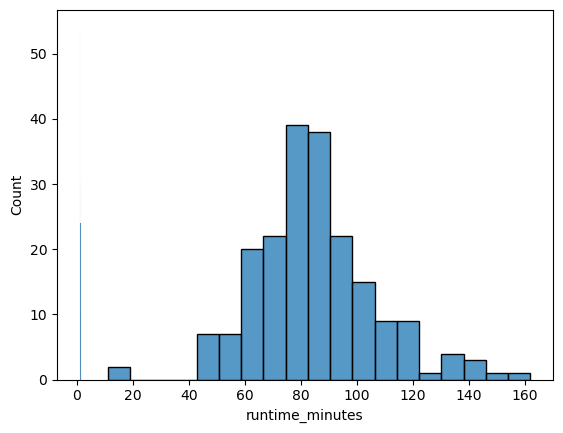

In [41]:
x = joined_df_votes['runtime_minutes'].head(200)
y = joined_df_votes['averagerating'].head(200)
sns.histplot(x)
sns.histplot(y)
plt.show()

In [42]:
nec_data = joined_df_votes [['genres', 'averagerating']]
nec_data.head()

,genres,averagerating
tconst,,
tt8446392,Drama,1.0
tt3262718,Drama,1.0
tt5277828,Horror,1.0
tt1611056,Drama,1.0
tt8654080,Horror,1.0


# Conclusion
Sample data was used for analysis.


# Recomendations

From the data analysedwould recommend;
  Movies with average minutes because it has the highest ratings.
  Documentary movies since they have the highest ratings.
  Drama movies mostly have poor ratings.